In [41]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter
from ast import literal_eval


In [74]:
# Load the Dataset
data = pd.read_csv("video_comments.csv")

data_comments = data["comments"]
#d = literal_eval(data_comments)
comments = []

for comment_list in data_comments:
    d = literal_eval(comment_list)
    for comment in d:
        comments.append(comment)
        
df = pd.DataFrame(comments, columns=['comments'])
df.head()

,comments
0,"जय भीम साथियों, बहुजन मीडिया को सपोर्ट करें। Support us if you like our work.\nPayTM, PhonePe, Google Pay - 8595794224 \n\nअकाउंट में भेजे मदद"
1,Heartiest congratulations to Sumit sir and whole team of News Beak ! This is proud moment to each of us who dreamt of equality based society and this is one of stepping stone. Jay bhim
2,ये हमारे पूरे समाज के लिए गर्व की बात है। सभी को बधाई। जय भीम
3,सर जीत हमारी होगी चाहे मेहनत जितना हो हुम करेंगे और बाबा साहेब डॉ आंबेडकर के सपने को पूरा करेंगे। जय भीम जय संविधान
4,Congratulations Sir & Whole team for this grand office. I will share this in our friend circle & definitely participate in this great work.


In [75]:
def count_length():
    df['word_count'] = df['comments'].apply(lambda x: len(str(x).split(" ")))

In [76]:
count_length()
df.tail(10)

,comments,word_count
29093,,1
29094,Usa is a great country,5
29095,"Ek brahmin UK ka PM bann giya Bharatio ka naam use karke\nAb USA mey ik aur brahmin President bannan ja raha, esko yahi rok doh",25
29096,Insaniyat Jeet gai itna likhate to bhi kafi tha.\nTumne Dil Mein vaham pal kar rakha hai.\nBrahmanon ko jalil karenge to dalit Khush hoge.\nHaqeeqat Mein Aisa bilkul bhi nahin hai.,29
29097,Bharat vich ta jatiwad ban nahi bharat vich manusmriti de carbn copy savidhan lagu hay manusmriti vich ve 6743 jati hay savidhan vich ve 6743 jati hay bhim rao da koi Andhbakt jawab dega,34
29098,Hail USA\nHail California\nHail Golden State,5
29099,Brahman bhagao bharat bachao,4
29100,SB 403 ka kon se Indian iska virodh kar the gandhi ji bhi to south Africa me rangbhed ke khilaf movement chala rhe the kyoki Indian ko angrej neecha mante the,33
29101,Weldon california people to abolish castism.thanks.,6
29102,अमेरिका मे डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि नौकरी करने वाले सच मे पढे लिखे होते है .भारत जैसा नही जहा 40% अंक प्राप्त करने वाले सरकार डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि कि नौकरी करते है,35


In [77]:
import re
emoji_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

for i in range(len(df)):
    df['comments'][i] = re.sub(emoji_pattern, '',df['comments'][i])
count_length()

/var/folders/s0/g38b44ks74v50d97tc_k00nr0000gn/T/ipykernel_54855/1326113580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'][i] = re.sub(emoji_pattern, '',df['comments'][i])


In [78]:
df.tail(10)

,comments,word_count
29093,,1
29094,Usa is a great country,5
29095,"Ek brahmin UK ka PM bann giya Bharatio ka naam use karke\nAb USA mey ik aur brahmin President bannan ja raha, esko yahi rok doh",25
29096,Insaniyat Jeet gai itna likhate to bhi kafi tha.\nTumne Dil Mein vaham pal kar rakha hai.\nBrahmanon ko jalil karenge to dalit Khush hoge.\nHaqeeqat Mein Aisa bilkul bhi nahin hai.,29
29097,Bharat vich ta jatiwad ban nahi bharat vich manusmriti de carbn copy savidhan lagu hay manusmriti vich ve 6743 jati hay savidhan vich ve 6743 jati hay bhim rao da koi Andhbakt jawab dega,34
29098,Hail USA\nHail California\nHail Golden State,5
29099,Brahman bhagao bharat bachao,4
29100,SB 403 ka kon se Indian iska virodh kar the gandhi ji bhi to south Africa me rangbhed ke khilaf movement chala rhe the kyoki Indian ko angrej neecha mante the,33
29101,Weldon california people to abolish castism.thanks.,6
29102,अमेरिका मे डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि नौकरी करने वाले सच मे पढे लिखे होते है .भारत जैसा नही जहा 40% अंक प्राप्त करने वाले सरकार डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि कि नौकरी करते है,35


In [79]:
def processText(text):
    text = text.lower()
    text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub('@[^s]+','',text)
    #text = re.sub('[s]+', ' ', text)
    #text = re.sub(r'#([^s]+)', r'1', text)
    #text = re.sub(r'[.!:?-\/]', r'', text)
    text = text.strip('""')
    return text
                      
for i in range(len(df)):
    df['comments'][i] = processText(df['comments'][i])

/var/folders/s0/g38b44ks74v50d97tc_k00nr0000gn/T/ipykernel_54855/1225057500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'][i] = processText(df['comments'][i])


In [80]:
df.tail(10)

,comments,word_count
29093,,1
29094,usa is a great country,5
29095,"ek brahmin uk ka pm bann giya bharatio ka naam use karke\nab usa mey ik aur brahmin president bannan ja raha, esko yahi rok doh",25
29096,insaniyat jeet gai itna likhate to bhi kafi tha.\ntumne dil mein vaham pal kar rakha hai.\nbrahmanon ko jalil karenge to dalit khush hoge.\nhaqeeqat mein aisa bilkul bhi nahin hai.,29
29097,bharat vich ta jatiwad ban nahi bharat vich manusmriti de carbn copy savidhan lagu hay manusmriti vich ve 6743 jati hay savidhan vich ve 6743 jati hay bhim rao da koi andhbakt jawab dega,34
29098,hail usa\nhail california\nhail golden state,5
29099,brahman bhagao bharat bachao,4
29100,sb 403 ka kon se indian iska virodh kar the gandhi ji bhi to south africa me rangbhed ke khilaf movement chala rhe the kyoki indian ko angrej neecha mante the,33
29101,weldon california people to abolish castism.thanks.,6
29102,अमेरिका मे डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि नौकरी करने वाले सच मे पढे लिखे होते है .भारत जैसा नही जहा 40% अंक प्राप्त करने वाले सरकार डाक्टर इंजीनियर प्रोफेसर व्याख्याता आदि कि नौकरी करते है,35


In [86]:
!pip install indic-nlp-library
from indicnlp.tokenize import indic_tokenize

def tokenization(indic_string):
    
    tokens = []
    for t in indic_tokenize.trivial_tokenize(
        indic_string):
        
        tokens.append(t)
        
    return tokens

  Obtaining dependency information for indic-nlp-library from https://files.pythonhosted.org/packages/ec/21/61240bcf965cedfec993497b38c42f054b149b9669e6d6cddeb1dee09d51/indic_nlp_library-0.92-py3-none-any.whl.metadata
  Obtaining dependency information for sphinx-rtd-theme from https://files.pythonhosted.org/packages/ea/46/00fda84467815c29951a9c91e3ae7503c409ddad04373e7cfc78daad4300/sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.5 MB/s eta 0:00:0000:0100:01


In [87]:
df['comments'] = df['comments'].apply(lambda x: tokenization(x))

In [88]:
df.tail(10)

,comments,word_count
29093,[],1
29094,"[usa, is, a, great, country]",5
29095,"[ek, brahmin, uk, ka, pm, bann, giya, bharatio, ka, naam, use, karke\nab, usa, mey, ik, aur, brahmin, president, bannan, ja, raha, ,, esko, yahi, rok, doh]",25
29096,"[insaniyat, jeet, gai, itna, likhate, to, bhi, kafi, tha, ., \ntumne, dil, mein, vaham, pal, kar, rakha, hai, ., \nbrahmanon, ko, jalil, karenge, to, dalit, khush, hoge, ., \nhaqeeqat, mein, aisa, bilkul, bhi, nahin, hai, .]",29
29097,"[bharat, vich, ta, jatiwad, ban, nahi, bharat, vich, manusmriti, de, carbn, copy, savidhan, lagu, hay, manusmriti, vich, ve, 6743, jati, hay, savidhan, vich, ve, 6743, jati, hay, bhim, rao, da, koi, andhbakt, jawab, dega]",34
29098,"[hail, usa\nhail, california\nhail, golden, state]",5
29099,"[brahman, bhagao, bharat, bachao]",4
29100,"[sb, 403, ka, kon, se, indian, iska, virodh, kar, the, gandhi, ji, bhi, to, south, africa, me, rangbhed, ke, khilaf, movement, chala, rhe, the, kyoki, indian, ko, angrej, neecha, mante, the]",33
29101,"[weldon, california, people, to, abolish, castism, ., thanks, .]",6
29102,"[अमेरिका, मे, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, आदि, नौकरी, करने, वाले, सच, मे, पढे, लिखे, होते, है, ., भारत, जैसा, नही, जहा, 40, %, अंक, प्राप्त, करने, वाले, सरकार, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, आदि, कि, नौकरी, करते, है]",35


In [89]:
for i in range(len(df)):
    df['comments'][i] = [s.replace("\n", "") for s in df['comments'][i]]

/var/folders/s0/g38b44ks74v50d97tc_k00nr0000gn/T/ipykernel_54855/1804329381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'][i] = [s.replace("\n", "") for s in df['comments'][i]]


In [90]:
df.tail(10)

,comments,word_count
29093,[],1
29094,"[usa, is, a, great, country]",5
29095,"[ek, brahmin, uk, ka, pm, bann, giya, bharatio, ka, naam, use, karkeab, usa, mey, ik, aur, brahmin, president, bannan, ja, raha, ,, esko, yahi, rok, doh]",25
29096,"[insaniyat, jeet, gai, itna, likhate, to, bhi, kafi, tha, ., tumne, dil, mein, vaham, pal, kar, rakha, hai, ., brahmanon, ko, jalil, karenge, to, dalit, khush, hoge, ., haqeeqat, mein, aisa, bilkul, bhi, nahin, hai, .]",29
29097,"[bharat, vich, ta, jatiwad, ban, nahi, bharat, vich, manusmriti, de, carbn, copy, savidhan, lagu, hay, manusmriti, vich, ve, 6743, jati, hay, savidhan, vich, ve, 6743, jati, hay, bhim, rao, da, koi, andhbakt, jawab, dega]",34
29098,"[hail, usahail, californiahail, golden, state]",5
29099,"[brahman, bhagao, bharat, bachao]",4
29100,"[sb, 403, ka, kon, se, indian, iska, virodh, kar, the, gandhi, ji, bhi, to, south, africa, me, rangbhed, ke, khilaf, movement, chala, rhe, the, kyoki, indian, ko, angrej, neecha, mante, the]",33
29101,"[weldon, california, people, to, abolish, castism, ., thanks, .]",6
29102,"[अमेरिका, मे, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, आदि, नौकरी, करने, वाले, सच, मे, पढे, लिखे, होते, है, ., भारत, जैसा, नही, जहा, 40, %, अंक, प्राप्त, करने, वाले, सरकार, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, आदि, कि, नौकरी, करते, है]",35


In [92]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [93]:
for i in range(len(df)):
    df['comments'][i]=[ele for ele in df['comments'][i] 
                       if ele not in (to_be_removed)]
count_length()
df.tail(10)

/var/folders/s0/g38b44ks74v50d97tc_k00nr0000gn/T/ipykernel_54855/2593687283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'][i]=[ele for ele in df['comments'][i] if ele not in (to_be_removed)]


,comments,word_count
29093,[],1
29094,"[usa, great, country]",3
29095,"[ek, brahmin, uk, ka, pm, bann, giya, bharatio, ka, naam, use, karkeab, usa, mey, ik, aur, brahmin, president, bannan, ja, raha, esko, yahi, rok, doh]",25
29096,"[insaniyat, jeet, gai, itna, likhate, bhi, kafi, tha, tumne, dil, mein, vaham, pal, kar, rakha, hai, brahmanon, ko, jalil, karenge, dalit, khush, hoge, haqeeqat, mein, aisa, bilkul, bhi, nahin, hai]",30
29097,"[bharat, vich, ta, jatiwad, ban, nahi, bharat, vich, manusmriti, de, carbn, copy, savidhan, lagu, hay, manusmriti, vich, 6743, jati, hay, savidhan, vich, 6743, jati, hay, bhim, rao, da, koi, andhbakt, jawab, dega]",32
29098,"[hail, usahail, californiahail, golden, state]",5
29099,"[brahman, bhagao, bharat, bachao]",4
29100,"[sb, 403, ka, kon, se, indian, iska, virodh, kar, gandhi, ji, bhi, south, africa, rangbhed, ke, khilaf, movement, chala, rhe, kyoki, indian, ko, angrej, neecha, mante]",26
29101,"[weldon, california, people, abolish, castism, thanks]",6
29102,"[अमेरिका, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, नौकरी, सच, पढे, लिखे, भारत, नही, जहा, 40, अंक, प्राप्त, सरकार, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, नौकरी]",21


In [94]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['comments'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'jai': 7427, 'bhim': 5973, 'जय': 5502, 'jay': 4809, 'hai': 4660, 'भीम': 2888, 'ko': 2763, 'sir': 2537, 'ke': 2090, 'bheem': 1990, 'ki': 1900, 'ji': 1724, 'ka': 1601, 'se': 1566, 'namo': 1535, 'nahi': 1248, 'bhi': 1211, 'hi': 1099, 'ho': 1087, 'bharat': 1046, 'समाज': 1025, 'h': 1013, 'aap': 1003, 'संविधान': 996, 'aur': 975, 'ye': 960, 'भारत': 946, 'bahut': 907, 'बहुजन': 881, 'चाहिए': 859, 'bsp': 848, 'dr': 846, 'good': 808, 'buddhay': 778, 'सर': 741, 'bahujan': 704, 'jindabad': 696, 'sc': 684, 'great': 678, 'sumit': 672, 'नमो': 670, 'obc': 657, 'bhai': 650, 'chahiye': 644, 'नही': 641, 'sath': 624, 'nhi': 603, 'samaj': 602, 'st': 599, 'log': 591, 'ek': 546, 'yadav': 515, 'kar': 512, 'लोग': 511, 'देश': 511, 'samvidhan': 510, 'hain': 503, 'बुद्धाय': 490, 'desh': 477, 'jo': 474, 'bjp': 468, 'सुमित': 467, 'baba': 463, 'liye': 462, 'evm': 460, 'यादव': 452, 'ne': 435, 'news': 417, 'kya': 417, 'nice': 410, 'budhay': 407, 'laxman': 402, 'par': 399, 'thanks': 397, 'ambedkar': 389, 'koi':

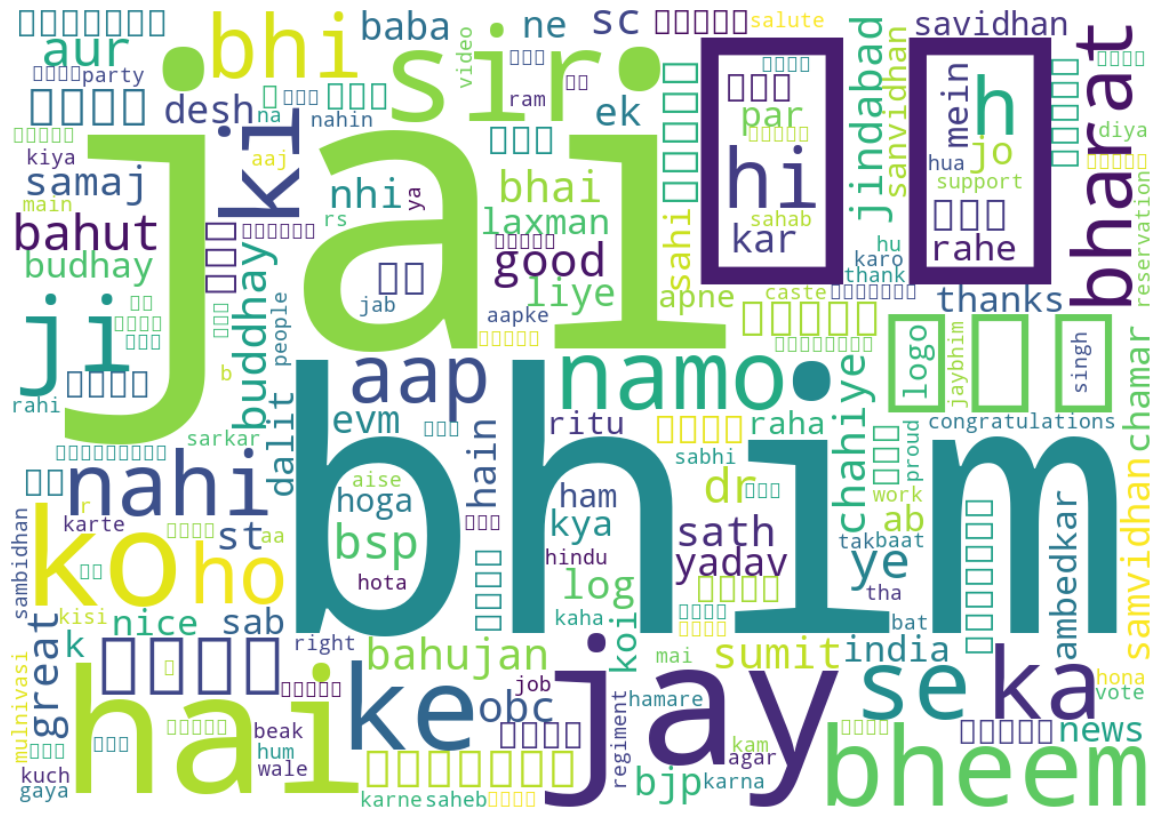

In [100]:
!pip install WordCloud
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_list = []
for i in range(len(df)):
    df_list +=df['comments'][i]
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [101]:
font = "gargi.ttf"
dictionary = Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, 
                font_path= font).generate_from_frequencies(dictionary)

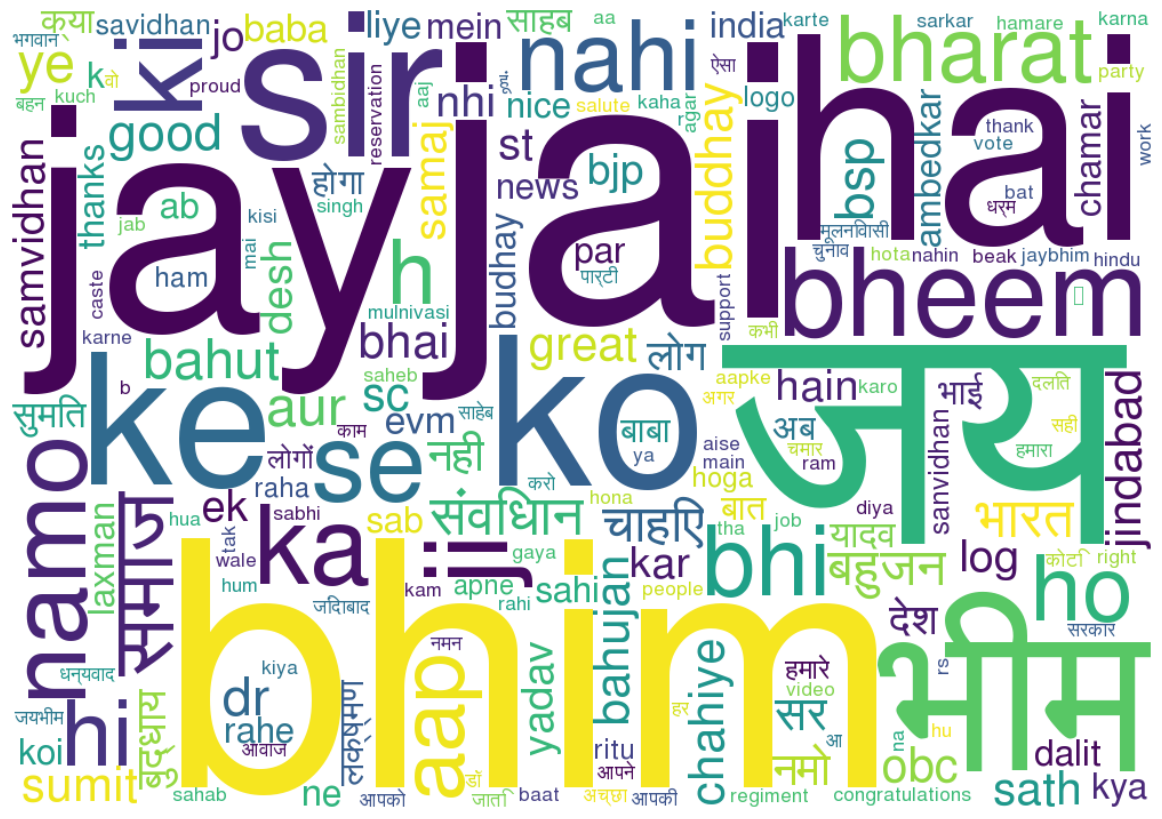

In [102]:
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [103]:
# remove the least common

least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['comments'][i]=[ele for ele in df['comments'][i] if ele not in (least_common)]

df.tail(10)

/var/folders/s0/g38b44ks74v50d97tc_k00nr0000gn/T/ipykernel_54855/2132889165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments'][i]=[ele for ele in df['comments'][i] if ele not in (least_common)]


,comments,word_count
29093,[],1
29094,"[usa, great, country]",3
29095,"[ek, brahmin, uk, ka, pm, bann, ka, naam, use, usa, mey, ik, aur, brahmin, president, ja, raha, esko, yahi, rok, doh]",25
29096,"[insaniyat, jeet, gai, itna, likhate, bhi, kafi, tha, tumne, dil, mein, pal, kar, rakha, hai, brahmanon, ko, jalil, karenge, dalit, khush, hoge, haqeeqat, mein, aisa, bilkul, bhi, nahin, hai]",30
29097,"[bharat, vich, ta, jatiwad, ban, nahi, bharat, vich, manusmriti, de, copy, savidhan, lagu, hay, manusmriti, vich, 6743, jati, hay, savidhan, vich, 6743, jati, hay, bhim, rao, da, koi, jawab, dega]",32
29098,"[hail, golden, state]",5
29099,"[brahman, bhagao, bharat, bachao]",4
29100,"[sb, 403, ka, kon, se, indian, iska, virodh, kar, gandhi, ji, bhi, south, africa, ke, khilaf, movement, chala, rhe, kyoki, indian, ko, angrej, neecha, mante]",26
29101,"[california, people, castism, thanks]",6
29102,"[अमेरिका, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, नौकरी, सच, पढे, लिखे, भारत, नही, जहा, 40, अंक, प्राप्त, सरकार, डाक्टर, इंजीनियर, प्रोफेसर, व्याख्याता, नौकरी]",21


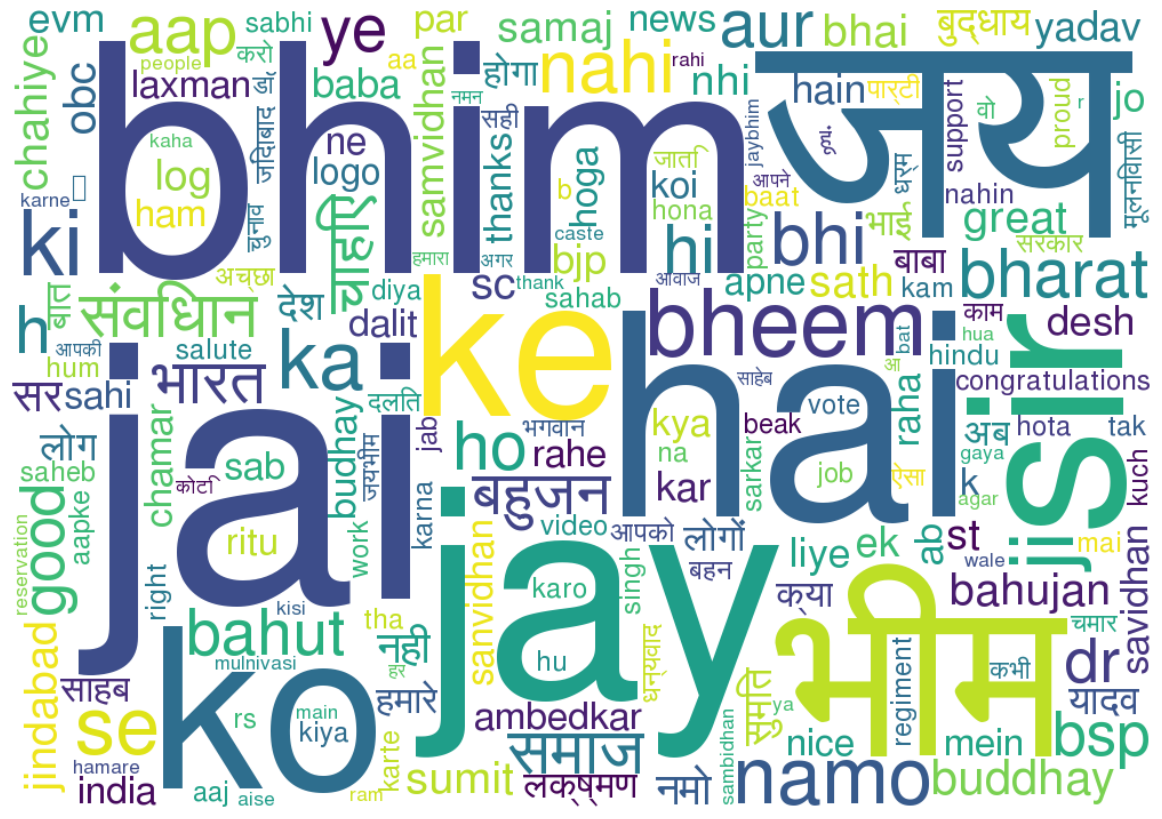

In [104]:
df_list_least_removed = []
for i in range(len(df)):
    df_list_least_removed +=df['comments'][i]
dictionary=Counter(df_list_least_removed)
wordcloud_least_removed = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)

plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud_least_removed,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()